<a href="https://colab.research.google.com/github/nallequintero/4geeks_class/blob/03_probability/Palmer_Penguins_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Data Analysis for Palmer Penguin data
- **Source**: Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. Artwork by @allison_hors
- **URL**: 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
- **Date**: 29/11/24
- **Goal**: Learn the basis of descriptive statistics

In [1]:
# Step 0. Load libraries and custom modules
# Data -----------------------------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1. Data loading
**Objective**: Obtain the data from source and get a first glimpse of their properties and presentation

In [3]:
# Step 1. Load data
# 1.1 Read the dataset from url
# Credits:
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
# Archipelago (Antarctica) penguin data. R package version 0.1.0.
# https://allisonhorst.github.io/palmerpenguins/
url = 'https://gist.githubusercontent.com/slopp/'+ \
      'ce3b90b9168f2f921784de84fa445651/raw/' + \
      '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
df_raw = pd.read_csv(url)

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>

**Image 1.** Penguins drawing. Artwork by @allison_hors.

In [4]:
# 1.2 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [7]:
# 1.3 Get a reproducible sample
df_raw.sample(10, random_state = 2025)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
172,173,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,male,2007
254,255,Gentoo,Biscoe,47.2,15.5,215.0,4975.0,female,2009
69,70,Adelie,Torgersen,41.8,19.4,198.0,4450.0,male,2008
236,237,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,female,2009
258,259,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,female,2009
60,61,Adelie,Biscoe,35.7,16.9,185.0,3150.0,female,2008
133,134,Adelie,Dream,37.5,18.5,199.0,4475.0,male,2009
264,265,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,female,2009
33,34,Adelie,Dream,40.9,18.9,184.0,3900.0,male,2007
124,125,Adelie,Torgersen,35.2,15.9,186.0,3050.0,female,2009


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

**Image 2.** Penguins dimensions. Artwork by @allison_hors.

### 2. Data preprocessing
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [10]:
df_raw.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [12]:
# Step 2. Prepara the dataset for analysis
# 2.1 Manage NaN values
df_baking = df_raw.copy()
df_baking = df_baking.drop(['rowid','year'], axis=1) # con la funcion drop eliminamos una columna
df_baking = df_baking.dropna(subset=['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g', 'sex'])
df_baking

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [13]:
df_baking['sex'] = pd.Categorical(df_baking['sex'])
df_baking['island'] = pd.Categorical(df_baking['island'])
df_baking['species'] = pd.Categorical(df_baking['species'])

In [15]:
df = df_baking.copy()

### 3. Exploratory Data Analysis
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [27]:
# 3.1 Get numerical and categorical summaries
media = df['body_mass_g'].mean()

In [30]:
mediana = df['body_mass_g'].median()
print(f"media: {media}', mediana: {mediana}")

media: 4207.057057057057', mediana: 4050.0


In [31]:
df['body_mass_g'].std()

805.2158019428966

In [33]:
mayor = df['body_mass_g'].max()
menor = df['body_mass_g'].min()
rango = mayor - menor
print(f"mayor: {mayor}', menor: {menor}, rango: {rango}")

mayor: 6300.0', menor: 2700.0, rango: 3600.0


In [19]:
df['body_mass_g'].describe()

,body_mass_g
count,333.000000
mean,4207.057057
std,805.215802
min,2700.000000
25%,3550.000000
50%,4050.000000
75%,4775.000000
max,6300.000000


In [38]:
display(df.describe(include='number').T)
# rango intercuartilico = Q3(75%) -Q1(25%)
display(df.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,male,168


In [ ]:
# 3.2 Count categorical values, in a stratified manner

In [43]:
df['sex'].value_counts(normalize=True)
df[['species','island']].value_counts()

species    island   
Gentoo     Biscoe       119
Chinstrap  Dream         68
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Name: count, dtype: int64

In [46]:
# 3.3 Create a cross table
pd.crosstab(df['species'],[ df['species'], df['island']])# el primer argumento es la unidad de conteo y el segundo es la lista de variables a cruzar

species   Adelie                 Chinstrap Gentoo
island    Biscoe Dream Torgersen     Dream Biscoe
species                                          
Adelie        44    55        47         0      0
Chinstrap      0     0         0        68      0
Gentoo         0     0         0         0    119

In [48]:
# 3.4 Calculate statistics by species
df.groupby('species', observed=False)['body_mass_g'].agg(['mean','median','std','max','min'])

,mean,median,std,max,min
species,,,,,
Adelie,3706.164384,3700.0,458.620135,4775.0,2850.0
Chinstrap,3733.088235,3700.0,384.335081,4800.0,2700.0
Gentoo,5092.436975,5050.0,501.476154,6300.0,3950.0


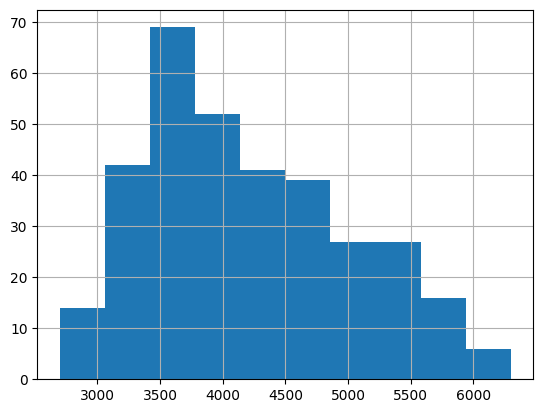

In [50]:
# 3.5 Show the histograms
df['body_mass_g'].hist()
plt.show()

<ipython-input-53-8722b14c0eea>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist(column="body_mass_g", by="species",sharey=True)


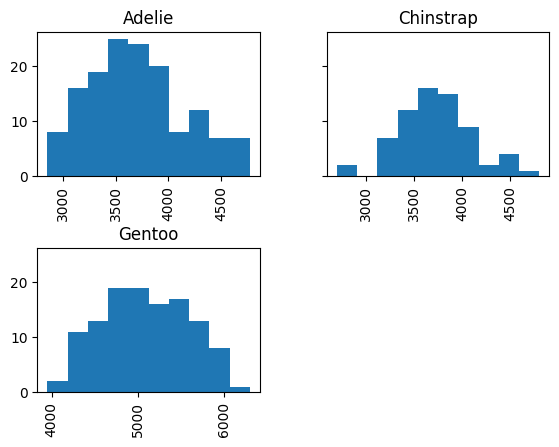

In [53]:
df.hist(column="body_mass_g", by="species",sharey=True)
plt.show()

<ipython-input-59-a33b7c706958>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['species']=='Adelie'].hist(column="body_mass_g",by = 'sex', sharey=True)


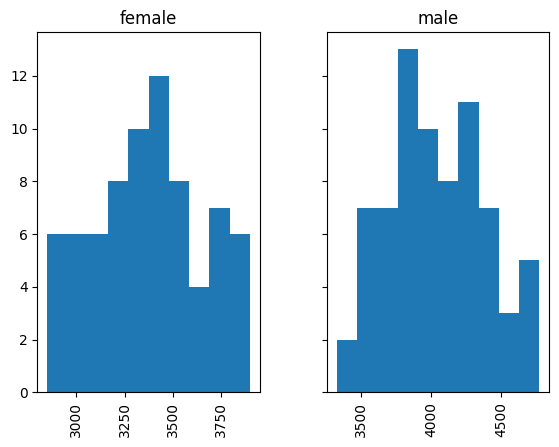

In [59]:
df[df['species']=='Adelie'].hist(column="body_mass_g",by = 'sex', sharey=True)
plt.show()

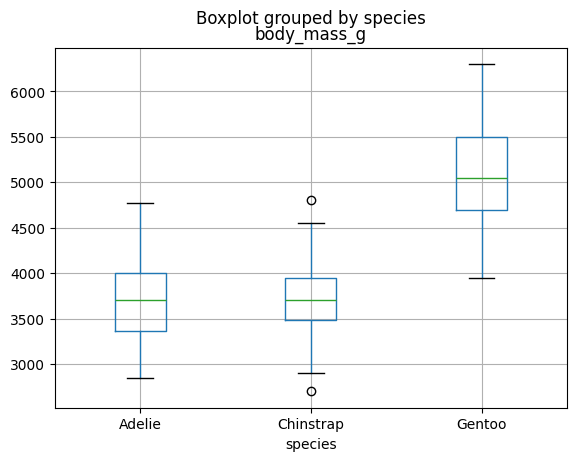

In [60]:
# 3.6 Show the boxplot of the numerical values
df.boxplot(column='body_mass_g', by='species')
plt.show()


In [61]:
fig = px.box(df, x="species", y="body_mass_g", color="species")
fig.show()

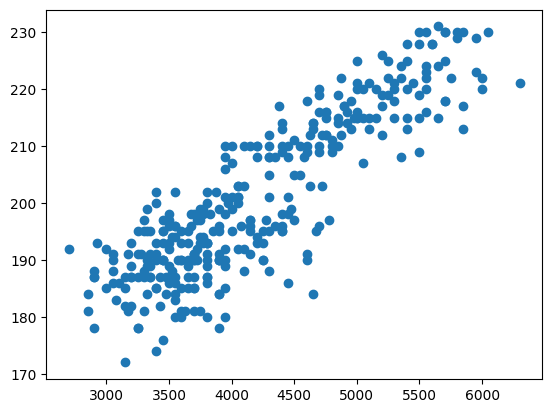

In [62]:
# 3.7 Show the bivariate analysis
plt.scatter(df['body_mass_g'], df['flipper_length_mm'])
plt.show()


In [ ]:
# 3.8 Calculate probabilities for continuous data
